<a href="https://colab.research.google.com/github/lucianosilvacraam/astro/blob/master/filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FILTRO PASSA-BAIXA**


Importação dos Módulos

In [0]:
import matplotlib.pyplot as plt
import numpy as np

Leitura e exibição tabular dos sinais

In [106]:
signal = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv',names=['desvio','tempo','media'],skiprows=1)[['tempo','media','desvio']]
signal

,tempo,media,desvio
0,2001-06-11 11:00,22.3,2.73
1,2001-06-11 11:10,23.0,1.98
2,2001-06-11 11:20,23.3,1.87
3,2001-06-11 11:30,22.0,2.03
4,2001-06-11 11:40,20.5,3.10
...,...,...,...
216,2001-06-12 23:00,22.0,2.03
217,2001-06-12 23:10,21.2,2.14
218,2001-06-12 23:20,22.9,2.35
219,2001-06-12 23:30,21.6,1.98


Gráfico dos Sinais

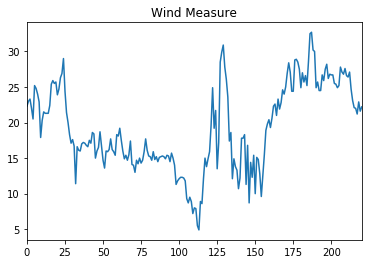

In [107]:
plt.title("Wind Measure")
plt.xlim(0,220)
plt.plot(signal['media'])

Aplicação do Filtro Passa-Baixa no Campo Média

Parâmetros configuráveis:

fc: frequencia de corte, em porcentagem da taxa de amostragem

b: banda de transição, em porcentagem da taxa de amostragem

Teoria de suporte ao filtro: https://tomroelandts.com/articles/how-to-create-a-simple-low-pass-filter 

In [0]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

s = list(signal['media'])
low_signal = np.convolve(s, sinc_func,mode='same')

Exibição do Sinal Filtrado

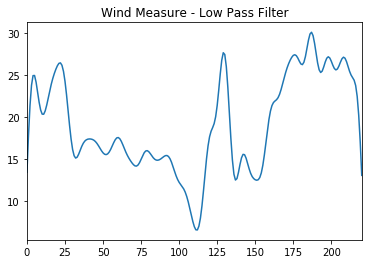

In [111]:
plt.title('Wind Measure - Low Pass Filter')
plt.xlim(0,220)
plt.plot(low_signal)

Comparação do Sinal Original com o Filtrado

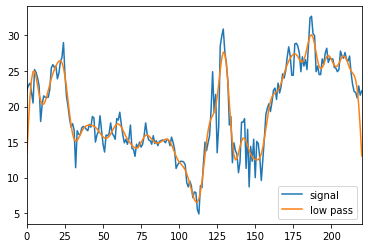

In [114]:
plt.xlim(0,220)
plt.plot(signal['media'],label='signal')
plt.plot(low_signal,label='low pass')
plt.legend(loc='lower right')